Q.Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv('crime_data.csv',)
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
 5   clust       50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [42]:
data.isnull()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [43]:
data.describe()

,Murder,Assault,UrbanPop,Rape,clust
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,0.900000
std,4.35551,83.337661,14.474763,9.366385,0.788954
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,0.000000
50%,7.25000,159.000000,66.000000,20.100000,1.000000
75%,11.25000,249.000000,77.750000,26.175000,1.750000
max,17.40000,337.000000,91.000000,46.000000,2.000000


In [44]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [45]:
data1.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


# Hierarchical clustering

In [46]:
def norm_func(i):
    X=(i-i.min())/(i.max()-i.min())
    return(X)

In [47]:
df_norm=norm_func(data1)
df_norm

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,0.5
1,0.554217,0.746575,0.271186,0.961240,0.5
2,0.439759,0.852740,0.813559,0.612403,0.5
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,0.5
5,0.427711,0.544521,0.779661,0.811370,0.5
6,0.150602,0.222603,0.762712,0.098191,0.0
7,0.307229,0.660959,0.677966,0.219638,0.0
8,0.879518,0.993151,0.813559,0.635659,0.5
9,1.000000,0.568493,0.474576,0.478036,0.5


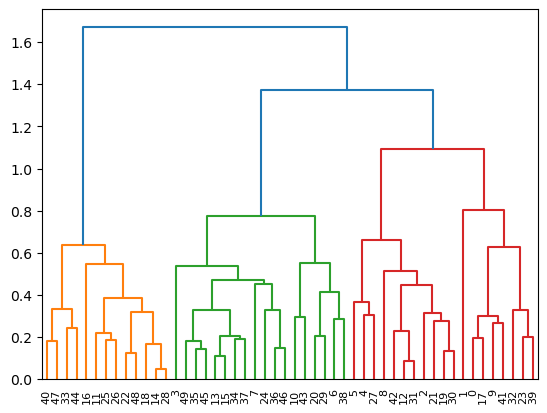

In [48]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [49]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [50]:
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['cluster'])

C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [51]:
clusters

,cluster
0,0
1,0
2,1
3,2
4,1
5,1
6,2
7,2
8,1
9,0


In [52]:
df_row=pd.concat([clusters,data1],axis=1)

In [53]:
df_row

,cluster,Murder,Assault,UrbanPop,Rape,clust
0,0,13.2,236,58,21.2,1
1,0,10.0,263,48,44.5,1
2,1,8.1,294,80,31.0,1
3,2,8.8,190,50,19.5,0
4,1,9.0,276,91,40.6,1
5,1,7.9,204,78,38.7,1
6,2,3.3,110,77,11.1,0
7,2,5.9,238,72,15.8,0
8,1,15.4,335,80,31.9,1
9,0,17.4,211,60,25.8,1


In [54]:
df_row.cluster.value_counts()

2    18
3    13
1    11
0     8
Name: cluster, dtype: int64

In [55]:
df_row2=df_row.groupby(df_row.cluster).mean()

In [56]:
df_row2

,Murder,Assault,UrbanPop,Rape,clust
cluster,,,,,
0,14.087500,252.750000,53.500000,24.537500,1.0
1,11.054545,264.090909,79.090909,32.618182,1.0
2,6.016667,143.888889,72.333333,19.344444,0.0
3,3.600000,78.538462,52.076923,12.176923,2.0


# k_means

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

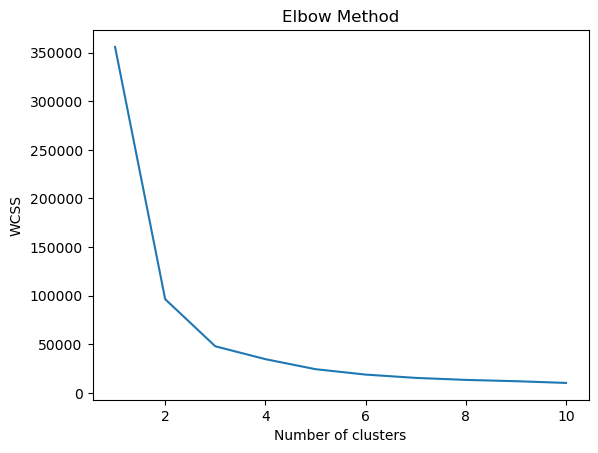

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
model=KMeans(n_clusters=3)
model.fit(df_norm)
model.labels_

C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO SSD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [60]:
md=pd.Series(model.labels_)
data['clust']=md
df_norm.head()

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,0.5
1,0.554217,0.746575,0.271186,0.961240,0.5
2,0.439759,0.852740,0.813559,0.612403,0.5
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,0.5


In [61]:
md

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    2
12    0
13    1
14    2
15    1
16    2
17    0
18    2
19    0
20    1
21    0
22    2
23    0
24    1
25    2
26    2
27    0
28    2
29    1
30    0
31    0
32    0
33    2
34    1
35    1
36    1
37    1
38    1
39    0
40    2
41    0
42    0
43    1
44    2
45    1
46    1
47    2
48    2
49    1
dtype: int32

In [62]:
data2=data.groupby(data.clust).mean()
data2

C:\Users\LENOVO SSD\AppData\Local\Temp\ipykernel_14076\12277010.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2=data.groupby(data.clust).mean()


,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.016667,143.888889,72.333333,19.344444
2,3.600000,78.538462,52.076923,12.176923


# DBSCAN

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data1.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [65]:
array=data1.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

In [66]:
stscaler=StandardScaler().fit(array)

In [67]:
X=stscaler.transform(array)

In [68]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.12803688],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.12803688],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.12803688],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.15233192],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.12803688],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.12803688],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.15233192],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.15233192],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.12803688],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.12803688],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.15233192],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.40840568],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.12803688],
       [-0.13637203, -0.70012057, -0.0

In [69]:
X.mean()

8.526512829121202e-17

In [70]:
dbscan=DBSCAN(eps=1.1,min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In [71]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1, -1,  2,  3,  1,  2,  3,  2,  3,
        0,  3,  1,  2,  1,  3,  0,  2,  3,  3, -1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  3,  2],
      dtype=int64)

In [72]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [73]:
data3=pd.concat([c1,data1],axis=1)

In [74]:
data3

,cluster,Murder,Assault,UrbanPop,Rape,clust
0,0,13.2,236,58,21.2,1
1,-1,10.0,263,48,44.5,1
2,1,8.1,294,80,31.0,1
3,2,8.8,190,50,19.5,0
4,-1,9.0,276,91,40.6,1
5,-1,7.9,204,78,38.7,1
6,2,3.3,110,77,11.1,0
7,-1,5.9,238,72,15.8,0
8,-1,15.4,335,80,31.9,1
9,-1,17.4,211,60,25.8,1


In [75]:
data3.cluster.value_counts()

 2    17
 3    13
-1     7
 1     7
 0     6
Name: cluster, dtype: int64